# Field Validation

In [1]:

import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import joblib  
import json

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.preprocessing import *
from utils.segmentation import *
from utils.plots import *


In [2]:
#load processed data
df = pd.read_csv('../../data/test/Accelerometer_ziyi_with_curb_segmented_abnormal_gereinigt.csv')
df.shape

(2686, 103)

In [3]:
# prepare data for model
# standardize data
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(df.iloc[:, 3:])
# Convert the scaled data back to DataFrames for further processing
test_data_scaled = pd.DataFrame(test_data_scaled, columns=df.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
test_data_scaled['curb_scene'] = df['curb_scene']
test_data_scaled['start_time'] = df['start_time']
test_data_scaled['end_time'] = df['end_time']
# Extract features (remove curb_scene, start_time, and end_time columns)
x_test = test_data_scaled.iloc[:, :-3]
y_true = test_data_scaled['curb_scene'].values
# Filter and slice the data
test_data_scaled_normal = test_data_scaled[test_data_scaled['curb_scene'] == 0].iloc[:, :-3]
test_data_scaled_abnormal = test_data_scaled[test_data_scaled['curb_scene'] == 1].iloc[:, :-3]
# Cast to float32
test_data_scaled_normal = test_data_scaled_normal.astype(np.float32)
test_data_scaled_abnormal = test_data_scaled_abnormal.astype(np.float32)



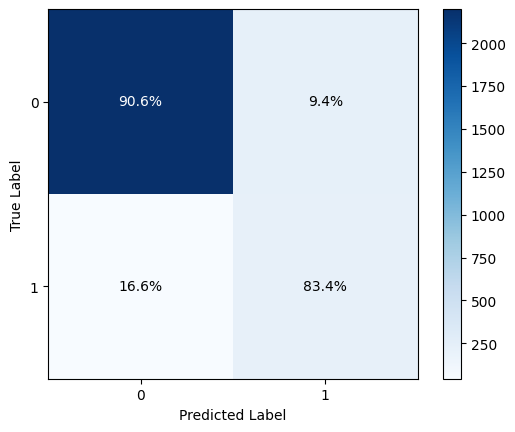

              precision    recall  f1-score   support

  Normal (0)      0.981     0.906     0.942      2427
Abnormal (1)      0.486     0.834     0.615       259

    accuracy                          0.899      2686
   macro avg      0.734     0.870     0.778      2686
weighted avg      0.933     0.899     0.910      2686



In [4]:
# Make predictions using one-class SVM
one_class_svm = joblib.load('../../models/ocsvm_best.joblib')
y_pred = one_class_svm.predict(x_test)
# Convert predictions to binary (1 for anomaly, 0 for normal)
y_pred = np.where(y_pred == -1, 1, 0)
# Evaluate results
metrics = plot_confusion_matrix(y_true, y_pred)

